#### O projeto é ficticio para uma imobiliaria que deseja preficiar seus preços por regiões. O foco do projeto será na região do rio de janeiro sede da empresa.

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Carregamento de dados e transformação dos dados Json

In [2]:
dados = pd.read_json(
    path_or_buf = 'json.txt',
    orient = 'columns'

)

dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


In [3]:
# Ideia é fazer um pré processamento dos dados transformando eles em uma estrutura dataframe, para isso vou usar o normalize 
# normalize é uma maneira de normaliza e fazer a leitura deles 

#apliquei em duas listas, dados ident e dados listing

dados_lista1 = pd.json_normalize(dados.ident)
dados_lista2 = pd.json_normalize(dados.listing, sep ='_')

In [4]:
# concatenei os dados em um dataframe único
dados_imoveis = pd.concat([dados_lista1,dados_lista2], axis = 1)
dados_imoveis

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3


# Análise exploratória de dados

In [5]:
#quantas colunas e dados eu tenho dentro da base
dados_imoveis.shape

(73615, 21)

In [6]:
#Info traz uma analise geral da informações e aqui consigo analisar que alguns dados estão como objeto 
# eu preciso para construção do ML que estejam em float ou inteiros (exemplo prices_price)
# outro ponto é o index que estão desalinhados e vou precisa alinhar dentro do dataframe

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  object 
 10  prices_tax_iptu           64499 non-null  object 
 11  prices_tax_condo          67111 non-null  object 
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

In [7]:
# contagem de dados ausentes  em cada coluna, contém alguns dados e eles devem ser 
# excluidos para evitar vies de algoritimo
dados_imoveis.isna().sum()

customerID                     0
source                         0
types_unit                     0
types_usage                    0
address_city                   0
address_location_lon         147
address_location_lat         147
address_zone                   0
address_neighborhood           0
prices_price                   0
prices_tax_iptu             9116
prices_tax_condo            6504
features_bedrooms              0
features_bathrooms             0
features_suites                0
features_parkingSpaces         0
features_usableAreas           0
features_totalAreas            0
features_floors                0
features_unitsOnTheFloor       0
features_unitFloor             0
dtype: int64

In [8]:
#como vou fazer um trabalho inicial com as regiões onde esses imoveis estão,
#vou aplica a mesma logica acima para entender onde está os gaps na base 
# tem 149 dados não distribuidos 

dados_imoveis.address_zone.value_counts()

Zona Oeste      37116
Zona Sul        19222
Zona Norte      15191
Zona Central     1921
                  165
Name: address_zone, dtype: int64

# Tratamento dos dados 

- Filtrar dados que vou trabalhar que será residencial e do estados do rio de janeiro 
- Reset dos index para que o dataset fique padronizado e sem quebras nas colunas 
- Transformar dados objetos(text) e transforma para números
- Limpeza dos dados null da base (coluna regiões)
- Substituição dos dados nan (regra de associação por bairro)
- Dados Null Taxas de condominio tratamento
- Dropar colunas desnecessarias + padronizar as colunas do dataframe

### Filtrar dados que vou trabalhar que será residencial e do estados do rio de janeiro

In [9]:
filtro = (dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] == 'Rio de Janeiro')

dados_imoveis = dados_imoveis[filtro]
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### Reset dos index para que o dataset fique padronizado e sem quebras nas colunas

In [10]:
dados_imoveis.reset_index(drop= True, inplace= True)

- Transformar dados objetos(text) e transforma para números

In [11]:
#Transformar dados objetos(text) e transforma para números
# uso o astype() para fazer a transformação da variaveis e também abro um dicionario 
# onde incluo os dados que desejo transforma e pra que tipo

dados_imoveis = dados_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'float64',
    'features_usableAreas': 'float64',
})

- Limpeza dos dados null da base (coluna regiões)

In [12]:
#Limpeza dos dados null da base (coluna regiões) 
#aqui a ideia é atribuir os valores que não estão atribuidos
#para em primeiro momento atribuição nan

dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

### Substituição dos dados nan (regra de associação por bairro)
- Para não manter os dados como nan na base, eu vou aplicar uma regra de associacao 
- A coluna bairro está completa, então vou associar as zonas faltantes, baseado na coluna bairro

In [13]:
# primeiro passo é realiza o filtro e a exclusão da coluna bairros
# pois não quero exemplo(2 zonas leste, com bairro Tatuape)

dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62.0, 'features_totalAreas': '62', 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathroo

In [14]:
# Após a filtragem dos dados e o drop dos null eu aplico a substituição
#consigo ver abaixo as informações associadas

dict_zona = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dict_zona)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [15]:
# vou agora aplicar esse ajuste no dataset, localizando os null e associando
for bairro,zona in dict_zona.items(): dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [16]:
#verificando e está ok os dados nan foram associados corretamente
dados_imoveis['address_zone'].isnull().sum()

0

### Dados Null Taxas de condominio tratamento
#### na análise exploratoria eu vi além dos dados atribuidos como string e eu preciso de float
#### os dados das colunas (prices_tax_condo e prices_tax_iptu tem valores não atribuidos
#### como não consigo associar como eu fiz pra bairro, vou aqui subtituir por zero

In [17]:
# aplica o alteração com a função fillna
dados_imoveis.prices_tax_condo.fillna(0, inplace = True)
dados_imoveis.prices_tax_iptu.fillna(0, inplace = True)

In [18]:
# e confirmo se os valores foram atribuidos, estão ok
dados_imoveis.isna().sum()

customerID                    0
source                        0
types_unit                    0
types_usage                   0
address_city                  0
address_location_lon        139
address_location_lat        139
address_zone                  0
address_neighborhood          0
prices_price                  0
prices_tax_iptu               0
prices_tax_condo              0
features_bedrooms             0
features_bathrooms            0
features_suites               0
features_parkingSpaces        0
features_usableAreas          0
features_totalAreas           0
features_floors               0
features_unitsOnTheFloor      0
features_unitFloor            0
dtype: int64

### Dropar colunas desnecessarias + padronizar as colunas do dataframe

In [19]:
# Drop das colunas que eu não vou usar no ML
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city', 
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [20]:
#Renomei as colunas e mantive os nomes mais simples
dicionario_colunas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

dados_imoveis = dados_imoveis.rename(dicionario_colunas, axis = 1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62.0,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44.0,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132.0,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60.0,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200.0,200,0,0,0


# Regressão Linear

#### Antes de criar o modelo é importante entender o grau de relação das variaveis por isso aplico a correlação 
#### No campo da estatística e da matemática a correlação se refere a uma medida entre duas ou mais variáveis que se relacionam, ela pode ser negativa ou positiva

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#carregamento do daset com a corrrelacao já feita e a importacao das bibliotecas para visualizar essas informações
correlacao= dados_imoveis.corr()
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.103729,-0.144041,-0.012715
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,1.000000,0.737802,0.121067
unitsOnTheFloor,-0.133700,0.005044,-0.000528,-0.130611,-0.107347,-0.091408,-0.074348,-0.144041,0.737802,1.000000,0.092434


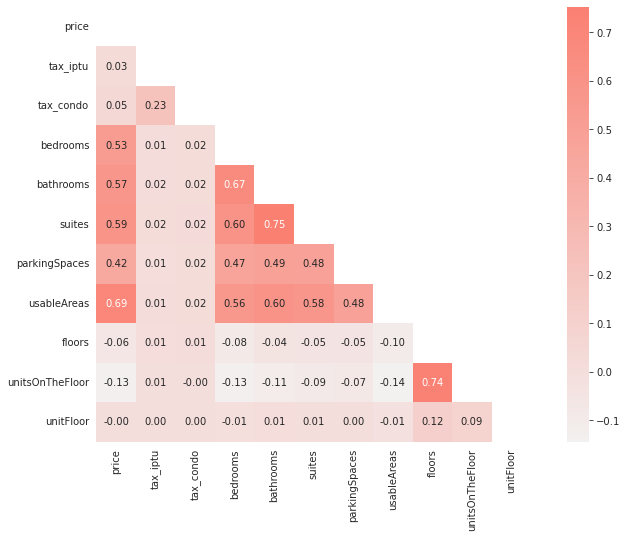

In [22]:
#visualização das correlações

# primeira linha do cod é uma variavel para armazenar a paleta de cores
#Mask funciona essencialmente com uma lista de booleanos (True/False)
#que quando aplicada à matriz original retorna os elementos de interesse
# e o restante seria o searn com as informações que eu quero visualiza

cores = sns.color_palette('light:salmon', as_cmap=True) 
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

##### Analisando a matriz de correlação consigo observar que as suites
##### tem uma forte relação com os banheiros o que é obvio porque para 
##### ser considera suite tem que haver banheiro no quarto 
##### e uma segunda correlacao muito forte é a unidade de segundo andar que esta 
##### muito relacionada com andar 

##### isso pode indicar multicolinearidade no dados que significa que existe um grau muito alto de correlacao
##### ou em outras palavras,
##### resulta quando a correlacao tem fatores que são, de certa forma, um pouco redundantes.

### Análise da distribuição da variável resposta

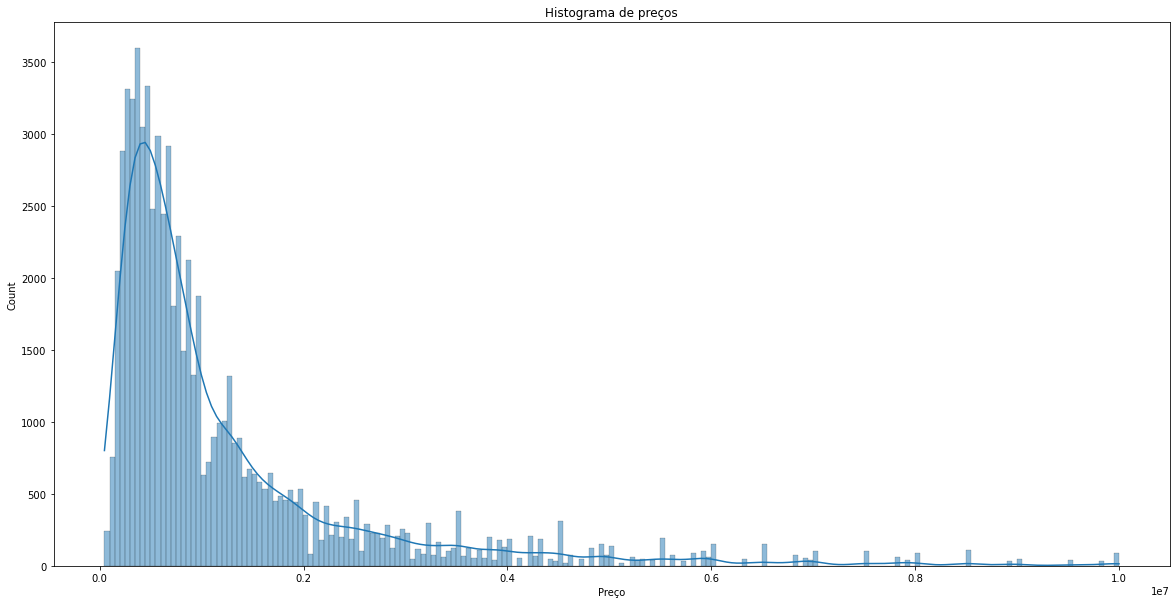

In [23]:
#Criei um histograma para entender as variaveis
# e o resultado foi que no dataset eu tenho mais valores
#baixos de imoveis do que valores altos e por isso 
#vai ser necessario o tramento desses dados, pois se for feito 
#o modelo assim vai gerar vies nos dados e o modelos nao vai 
#saber preficiar corretamente os dados


ax = sns.histplot(data=dados_imoveis, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

## Transformação das variáveis

#### vou aplicar a transformação logarítmica nos dados 
#### é usada quando os dados têm uma distribuição distorcida positivamente e existem alguns valores grandes.

In [24]:
# importo a biblioteca que fará essa transformação 
#essa função está dentro do pacote sklearn e se chama FunctionTransformer
# o FunctionTransformer permiti que seja criado transformadores personalizados para os dados
from sklearn.preprocessing import FunctionTransformer

#abro uma variavel que se chama transformer, trago a funcao FunctionTransformer
# em seguida passo o parametro np.log1p, validate=True que signfica que 
#todos os dados de entradas com valor real deve retornaar saidas reais
transformer = FunctionTransformer(np.log1p, validate=True)

#nesse ponto eu abro uma nova variavel onde vai trazer as funcoes acima
# e excluindo dados categoricos ou objetos da transformacao
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object']))

#nessa etapa eu excluo no dataset a coluna objetos
colunas_dados_tranformados = dados_imoveis.select_dtypes(exclude=['object']).columns

# E aqui eu trago a concatenação das informações transformadas dentro do meu dataset
df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,unit,zone,totalAreas,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,62,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,0,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,132,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,0,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,200,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,0.000000,0.000000,0.000000


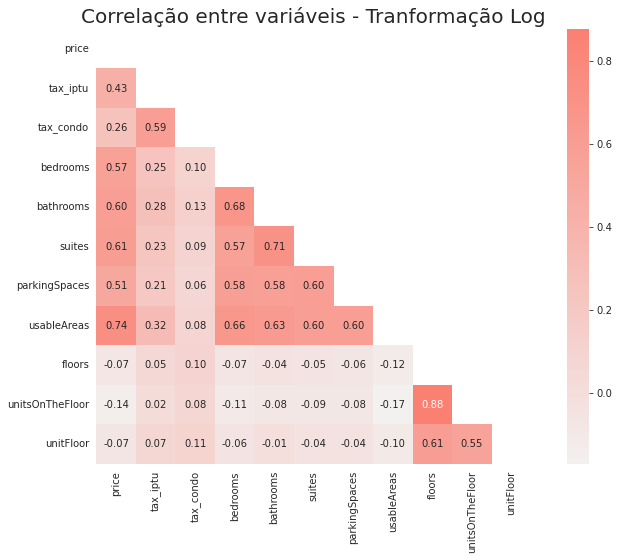

In [25]:
#depois da transformação logarítmica eu faço a mesma visualização com a matriz de correlação
# para ver o impacto das transformações

#correlações foram amenizadas 

correlacao_transformado = df_transformado.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)


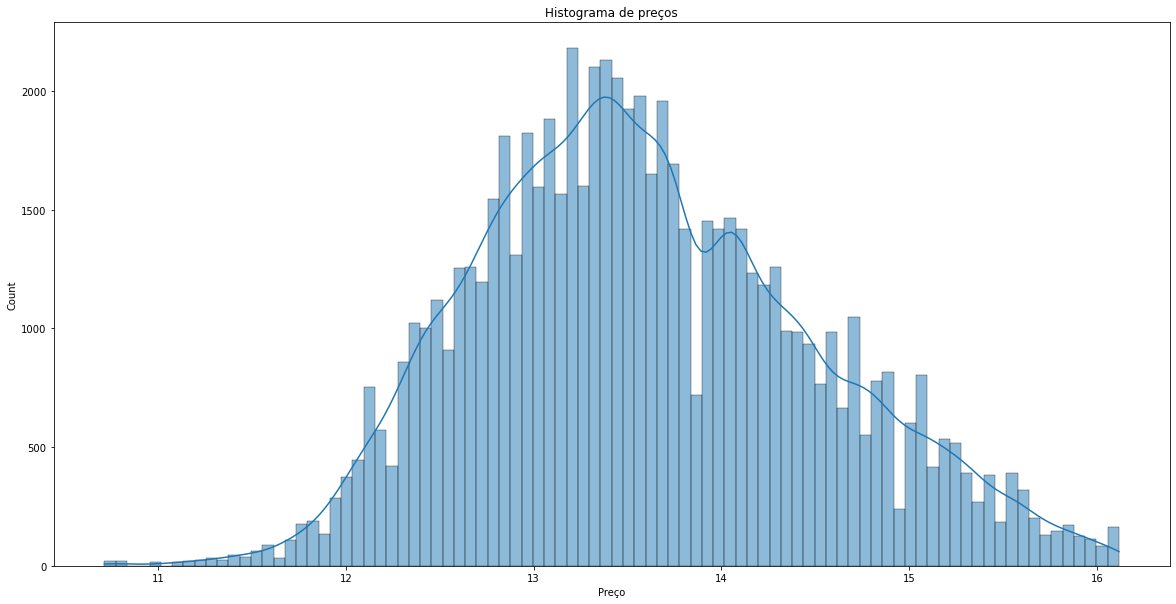

In [26]:
#para confirmar além da matriz 
#vou plotar o histograma 

#com os preços ajustados a distruibuição fica mais simetria para ser aplicada no modelo

ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

## Pré processamento das variaveis categoricas faltantes 

In [27]:
#conformo quais são as variaveis que ainda estão categoricas no meu dataset
#incluindo o dataset objetos 

variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns
variaveis_categoricas

Index(['unit', 'zone', 'totalAreas'], dtype='object')

In [28]:
# lembrando que no ML não tem dados categorico 
#pois o algoritimo só entende e aprende em binario então para trazer esse 
#processamento eu vou usar o  função pandas.get_dummies() recebe uma lista,
#ou uma string que pode será convertida em lista a partir de um separador, e cria uma coluna para cada dummie (dado categorico) 
#com um dado númerico que representa aquele dummie em uma data linha


df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul,totalAreas_0,totalAreas_0,totalAreas_1,...,totalAreas_9895,totalAreas_99,totalAreas_990,totalAreas_992,totalAreas_993,totalAreas_994,totalAreas_995,totalAreas_996,totalAreas_997,totalAreas_999
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#conateno as variveis categoricas com o dataset que eu 
#estou trabalhando

dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1) 
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,floors,unitsOnTheFloor,...,totalAreas_9895,totalAreas_99,totalAreas_990,totalAreas_992,totalAreas_993,totalAreas_994,totalAreas_995,totalAreas_996,totalAreas_997,totalAreas_999
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,1.386294,1.609438,...,0,0,0,0,0,0,0,0,0,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


# Regressão Linear

- Regressão linear é um modelo matemático que consegue, a partir da entrada de fenômenos, prever a causalidade deles.

- Regressão Simples: a variável dependente (regressando ou y) se relaciona a uma única variável explanatória (regressor ou X)

- Regressão Múltipla: a variável dependente (regressando ou y) se relaciona a mais de uma única variável explanatória (regressor ou Xi)

## Ajuste e Previsão
no caso desse projeto eu tenho uma regressao multipla que seria meu Y(preços do imovel) se relacionando com um conjunto de X(taxas de condomonios)


# Divisão de treino e teste

In [30]:
#realizo a separação dos dados 

#variáveis explanatórias (independentes)
X = dados_imoveis_dummies.drop('price', axis=1)

#variável dependente
y = dados_imoveis_dummies['price']

In [31]:
#divisão em conjunto de treino e teste
from sklearn.model_selection import train_test_split

#divisão em conjunto de treino e teste
#defino os dados de treino e teste, determino o tamanho do tamanho do meu teste que aqui é 0.3
# e o random para manter a escabilidade de treino 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de ML - Regressão

In [32]:
#import a biblioteca do sklearn que faz o processo de regressao linear
from sklearn.linear_model import LinearRegression

In [33]:
#Instanciando o modelo
# determinando a instancia o modelo vai saber
#qual algoritimo esta sendo usado, o tipo de dados
#também como tamanho e treinamento distruibuido

lr = LinearRegression()

In [34]:
#treino meu modelo 
lr.fit(X_treino, y_treino)

LinearRegression()

In [35]:
#testo meu modelo
previsao_lr = lr.predict(X_teste)

In [36]:
#resultados da previsão
previsao_lr

array([13.31378174, 12.58917236, 12.89572144, ..., 13.11746216,
       12.32873535, 14.52310181])

In [37]:
#transformação inversa 
np.expm1(13.25768024)

572448.7513552749

# Métrica de desempenho

- Coeficiente de Determinação
- descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
-r2 situa-se entre 0 e 1
- r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."

In [38]:
#importo a biblioteca do Sklearn 
from sklearn.metrics import r2_score

#coloco as informação numa variaveis e trago 
#os dados de teste que eu trabalhei acima, os dados de previsao

r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

-2.1749643228830445e+17

# Árvore de Decisão para Regressão

#### É um mapa dos possíveis resultados de uma série de escolhas relacionadas. 
#### Permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades e benefícios

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
#Instanciando o modelo
# além de criar o modelo eu tenho dois pontos importantes aqui 
# um randon_stante que torna meu modelo escalavel 
# max_depth eu delimito o quanto eu quero que minha arvore cresça
#pois o modelo tem a se aprofundar muito 
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [41]:
#Treino
dtr.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [42]:
#Teste
previsao_dtr = dtr.predict(X_teste)

In [43]:
#Resultados da previsão
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

#### Para visualiza o qual bom foi meu modelo vou usar a biblioteca de visualização YellowBrick 
#### Gráfico de erro de predição: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos
#### esse grafico me ajuda a observa e os dados estão alinhados, quanto mais alinhado mais perfeito o modelo é

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


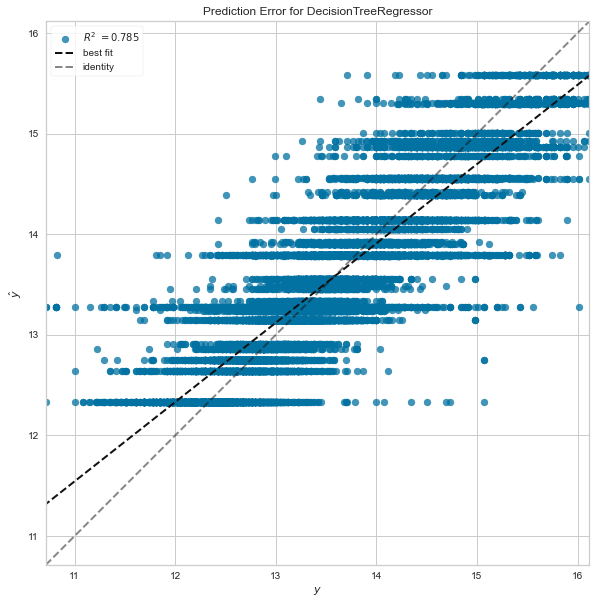

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [45]:
#trago os dados de treino e teste 
# o modelo deve um grau de acerto muito bom de 78%
#outro ponto importante é o grau a linearidade dos dados 
# que estão bem alinhados 

from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Métrica de desempenho

In [46]:
#coeficiente de determinacao 
r2_dtr = r2_score(y_teste, previsao_dtr)
r2_dtr

0.7846916218477399

# Random Forest para Regressão

#### Irá criar muitas arvore de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta
#### onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
#Instanciando o modelo
# além de criar o modelo eu tenho dois pontos importantes aqui 
# um randon_stante que torna meu modelo escalavel 
# max_depth e n_estimators eu delimito o quanto eu quero que minha floresta cresça
#pois o modelo tem a se aprofundar muito 

rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [52]:
#Treino
rf.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [53]:
#Teste
previsao_rf = rf.predict(X_teste)

## Gráfico de erro de predição

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


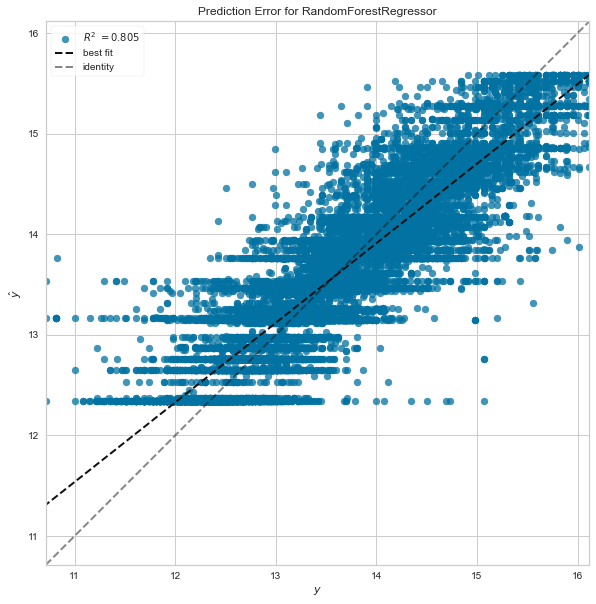

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [51]:
#trago os dados de treino e teste 
# o modelo deve um grau de acerto muito bom de 0.80
#outro ponto importante é o grau a linearidade dos dados 
# que estão bem alinhados


from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Métrica de desempenho

In [54]:
#coeficiente de determinacao
r2_rf = r2_score(y_teste, previsao_rf)
r2_rf

0.8051936119045887

# Técnicas de Otimização
_____________________________________________

#### Cross Validation (Validação Cruzada)
É uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina.
#### Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)
Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio.

## Otimizando a árvore de decisão

In [63]:
#divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold

#definindo splits que será o número de decisoes 
# e shufle true para fazer aleatorio
cv = KFold(n_splits = 5, shuffle=True)

## Cross validation

In [64]:
from sklearn.model_selection import cross_val_score 

In [65]:
# passo alguns parametros como estimartor = dtr variavel onde esta a arvore
# os dados de treino e teste 
#scoring r2 que é o coefiente de decisao da minha arvore
# e cv que é o kfold que eu determinei acima

desempenho_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = X_treino, 
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.782


## Random Search Validação
Validar as otimização que eu quero dentro da minha arvore de decisao

In [66]:
#seleção de hiperparâmetros da arvore decisao 
#max e min de profundidada, max e min de nós ects
# onde eu quero que eu faça uma busca aleatoria
# para trazer a melhor combinacao

param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#defino os parametros para rodar meu modelo
#dtr a minha variavel arvore de decisao

random_cv_dt = RandomizedSearchCV(
    dtr, 
    param_random_dt, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1
)

In [ ]:
# abri uma variavel para armazena meu modelo 
randomcv_dtr = random_cv_dt.fit(X_treino, y_treino)

In [ ]:
# incluo dentro de um dataframe para ver os melhores resultados
pd.DataFrame(randomcv_dtr.cv_results_)

In [ ]:
#a melhor combinação do meu conjunto
randomcv_dtr.best_params_

In [ ]:
#o melhor score da minha combinacao
randomcv_dtr.best_score_

## Random Search Teste
Após os hiperparametros definidos eu vou testar ele de fato na minha arvore de decisao
para regressao

In [ ]:
#defino os parametros para rodar meu modelo
#dtr a minha variavel arvore de decisao

rf_otimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [ ]:
# abri uma variavel para armazena meu modelo 
rf_otimizado2.fit(X_treino, y_treino)

In [ ]:
# incluo dentro de um dataframe para ver os melhores resultados
predicao_rf_otimizado2 = rf_otimizado2.predict(X_teste)

In [ ]:
#a melhor combinação do meu conjunto
r2_score(y_teste, predicao_rf_otimizado2)

# Escolhendo o melhor modelo

In [ ]:
#tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % r2_score(y_teste, predicao_dtr_otimizado))
print("Floresta Aleatória: %f" % r2_score(y_teste, predicao_rf_otimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(desempenho_cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(desempenhoRF_cross_val_r2.mean(), 3))

In [ ]:
#Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana

In [ ]:
#Verificando resultados
predicao_cliente_joana = rf_otimizado2.predict(cliente_joana)
np.expm1(predicao_cliente_joana)